### New paragraph
this is *rich* **Text** with 

```python
print("Hello world")
```

and images :
![image](http://jupyter.org/assets/main-logo.svg)

**명령모드에서 단축키**
- Enter : 편집모드로 전환
- y/m : 코드셀 / 마크다운 셀로 셀 타입 변환
- a/b: 현재 셀의 위 아래에 새 셀 추가
- x/c/v : 현제 셀에 대한 cut/copy/paste
- dd: 현재 셀 삭제
- z : 마지막 삭제 연산 취소
- h : 키보드 단축키 목록

#### 판다스로 도표그리기 http://pandas.pydata.org/pandas-docs/stable/visualization.html 

data set
git clone https://github.com/ipython-books/minibook-2nd-data


In [6]:
print("hello world")

hello world


In [7]:
2*2

4

In [8]:
items = [1,2,3,4,5]

In [9]:
for item in items:
    print(item)

1
2
3
4
5


In [10]:
def is_even(number):
    return number%2 == 0

In [11]:
is_even(5)

False

In [12]:
is_even(6)

True

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
%cd ./Gitzone/

[WinError 2] 지정된 파일을 찾을 수 없습니다: './Gitzone/'
C:\Users\wine_CH\Anaconda3_workspace\Gitzone


In [15]:
data_filename = 'data/nyc_data.csv'
fare_filename = 'data/nyc_fare.csv'

In [16]:
data = pd.read_csv(data_filename, parse_dates = ['pickup_datetime','dropoff_datetime'])

In [17]:
fare = pd.read_csv(fare_filename, parse_dates = ['pickup_datetime'])

In [18]:
data.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [19]:
p_lng = data.pickup_longitude
p_lat = data.pickup_latitude
d_lng = data.dropoff_longitude
d_lat = data.dropoff_latitude

In [20]:
def lat_lng_to_pixels(lat,lng):
    lat_rad = lat*np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0)/ 2.0))
    x = 100 * (lng+180.0)/360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [21]:
px,py = lat_lng_to_pixels(p_lat,p_lng)

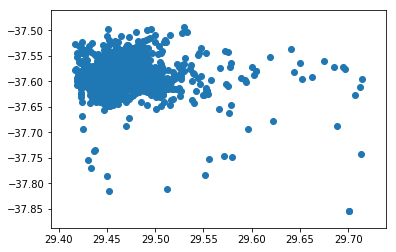

In [22]:
plt.scatter(px,py)

(29.4, 29.55, -37.63, -37.54)

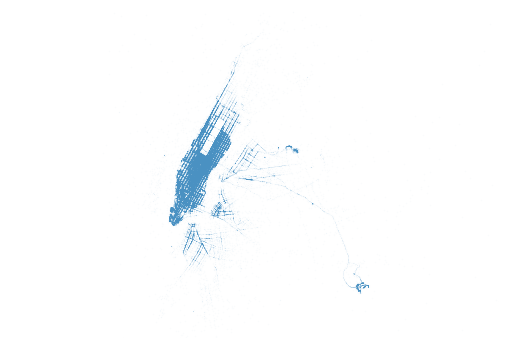

In [23]:
plt.figure(figsize=(8,6)) # figure 함수는 그림의 크기를 인치로 명시
plt.scatter(px,py,s=.1,alpha=.03) # 산점도를 변경하는 다양한 키워드 아규먼트를 입력받음
# s 로 마커크기 작게, 작은 alpha 불투명 값 : 이 점들은 거의 투명하게 하여, 고밀도를 강조할 수 있다
plt.axis('equal') # 같은 가로, 세로비를 사용
plt.xlim(29.40,29.55) #축 제한 명시
plt.ylim(-37.63,-37.54)
plt.axis('off') # 축 제거

=== pandas and seaborn ===

In [22]:
px.count(),px.min(),px.max()

(846945, 29.417137499999995, 29.71431305555556)

In [2]:
!conda install seaborn -q -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\wine_CH\Anaconda3

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    matplotlib-3.0.0           |   py37hd159220_0         6.7 MB
    patsy-0.5.1                |           py37_0         375 KB
    numpy-1.15.4               |   py37ha559c80_0          36 KB
    numpy-base-1.15.4          |   py37h8128ebf_0         3.9 MB
    mkl-2018.0.3               |                1       178.1 MB
    mkl_fft-1.0.6              |   py37hdbbee80_0         120 KB
    ------------------------------------------------------------
                                           Total:       189.2 MB

The following packages will be UPDATED:

    matplotlib: 2.2.3-py37hd159220_0  --> 3.0.0-py37hd159220_0 
    mkl_fft:    1.0.4-py37h1e22a9b_1  --> 1.0.6-py37hdbbee80_0 
    numpy: 

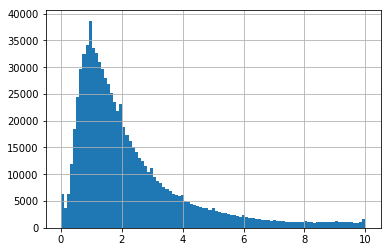

In [23]:
import seaborn as sns
data.trip_distance.hist(bins=np.linspace(0.,10.,100)) # hist는 Series 객체에 있는 값으로 히스토그램을 그린다 
#linspace 함수로 0부터 10까지에서 같은 크기로 100개를 생성